## Quantum Random Number Generation  
We are working on incorporating quantum random number generation to display numbers in our game. It cureently uses the random function in NumPy to decide which numbers are displayed and which type of qubit box is chosen (Superposition or Entangled). This notebook is to experiement with quantum random number generation methods in order to find the one suitable for us.   



In [16]:
import numpy as np 
from qiskit import * 
from qiskit.visualization import plot_histogram 

### Deciding between Superposiion and Entanglement Box  
We have used the Hadamard gate on a one-qubit quantum circuit to decide which type of qubit boxes are dosplayed in each round. We generate a one qubit circuit with a Hadamard gate applied on it and then we measure it to decide the qubit box. 

In [17]:
pattern_circ = QuantumCircuit(1)
pattern_circ.h(0)
pattern_circ.measure_all()

backend = Aer.get_backend('qasm_simulator')

result = execute(pattern_circ, backend,shots=1).result()
counts = result.get_counts()
print('Result dictionary :', counts)
flag = int(list(counts.keys())[0],2)
print('flag :', flag)

if flag == 0 : 
    pattern = 'Superposition'
elif flag == 1 : 
    pattern = 'Entanglement'

print('Pattern for this round is : ', pattern )

Result dictionary : {'1': 1}
flag : 1
Pattern for this round is :  Entanglement


### Displaying Numbers  

Now, we need to find a way to select numbers to be displayed in each round. First we need to check which qubit box is chosen for the round and then select 2 or 4 numbers to display accodingly. A 5 qubit quantum cirucit with hadamard on each register gives random numbers from 0 to 31. For a 5x5 Bingo! matrix, this circuit is enough but would need some if statements to avoid the numbers which are not in use and the numbers which have already been displayed.  

{'11101': 29, '10100': 28, '11100': 49, '10111': 30, '10001': 31, '11001': 30, '01100': 30, '01010': 39, '10000': 26, '00101': 41, '10101': 31, '01111': 27, '01000': 41, '00010': 25, '10011': 29, '00111': 35, '11011': 38, '11000': 35, '01110': 26, '01101': 34, '00110': 29, '00011': 35, '10110': 36, '10010': 31, '11111': 28, '00001': 23, '00000': 30, '00100': 33, '11010': 27, '11110': 30, '01001': 24, '01011': 20}
{0: 30, 1: 23, 2: 25, 3: 35, 4: 33, 5: 41, 6: 29, 7: 35, 8: 41, 9: 24, 10: 39, 11: 20, 12: 30, 13: 34, 14: 26, 15: 27, 16: 26, 17: 31, 18: 31, 19: 29, 20: 28, 21: 31, 22: 36, 23: 30, 24: 35, 25: 30, 26: 27, 27: 38, 28: 49, 29: 29, 30: 30, 31: 28}


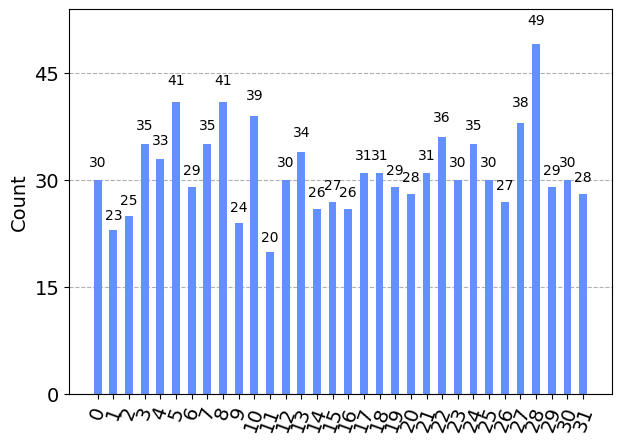

In [24]:
display = QuantumCircuit(5) 
display.h(list(range(5)))
display.measure_all() 

backend = Aer.get_backend('qasm_simulator')

result = execute(display, backend,shots=1000).result()
counts = result.get_counts()
print(counts)
int_counts = dict(sorted({int(key, 2): value for key, value in counts.items()}.items()))
print(int_counts)
plot_histogram(int_counts)
